# Loading Libraries

In [4]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [5]:
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype

import datetime
from dateutil.relativedelta import relativedelta

import itertools

from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import DBSCAN, KMeans
from sklearn.model_selection import GridSearchCV

from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from scipy.stats import iqr

import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

pd.set_option('display.float_format', lambda x: '%.4f' % x)
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')
import imblearn
from sklearn.model_selection import train_test_split # Import train_test_split function
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from numpy.random import seed


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_auc_score, roc_curve
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import RFECV

In [6]:
df_hist = pd.read_excel("dataCOMP0050Coursework1.xlsx")
# df_hist.head()

#Preprocessing

In [7]:
# df_hist.tail()

In [8]:
df_hist.shape

(8929, 21)

In [9]:
dfstat0=df_hist.copy()

## Statistical Analysis

RENT        4011
MORTGAGE    3768
OWN         1150
Name: home_ownership, dtype: int64
['RENT', 'MORTGAGE', 'OWN']


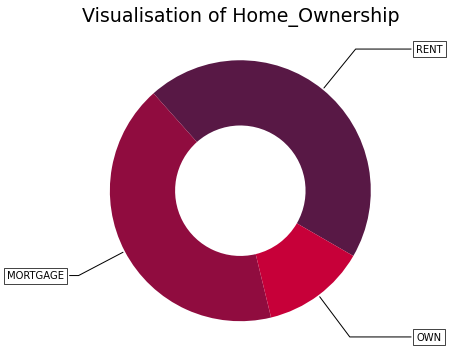

In [10]:
# ################## Pie Chart for Home Ownership ##################################
fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(aspect="equal"))
df_homeownership=dfstat0['home_ownership']
homeownership=df_homeownership.value_counts()
print(homeownership)
labels_homeownership=homeownership.index.tolist()
print(labels_homeownership)

wedges, texts = ax.pie(homeownership, wedgeprops=dict(width=0.5), startangle=-30,colors=('#581845','#900C3F','#C70039','#FFC30F'))
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels_homeownership[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Visualisation of Home_Ownership",size=19)

plt.show()


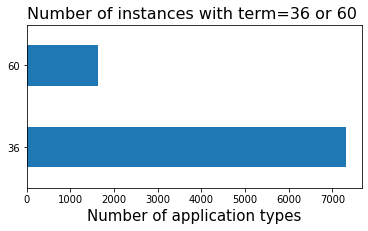

In [11]:
# ################## Bar Chart for Term sizes ##################################
fig, ax = plt.subplots(figsize=(6, 3))
df_term=dfstat0['term']
term_frequencies=df_term.value_counts()
ax = term_frequencies.plot.barh()
plt.xlabel('Number of application types', size=15)
plt.title('Number of instances with term=36 or 60 ', size=16)
plt.show()

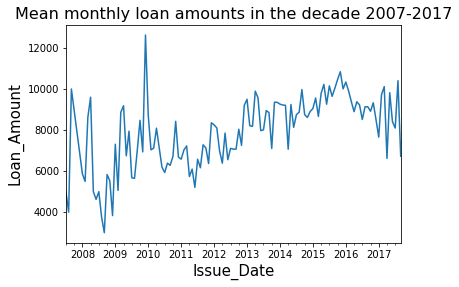

In [12]:
dfstat2=df_hist.copy()
dfstat2.head()
df_inc_loan=dfstat2[['issue_d','loan_amnt']]
df_inc_loan['issue_d']=pd.to_datetime(df_inc_loan['issue_d'])
df_inc_loan.sort_values(by=['issue_d'], inplace=True, ascending=True)
df_inc_loan2=df_inc_loan.dropna()
df_inc_loan2
df_inc_loan3=df_inc_loan2.groupby(pd.PeriodIndex(df_inc_loan2['issue_d'], freq="M"))['loan_amnt'].mean()

df_inc_loan3.plot.line(x='issue_d',y='loan_amnt')
plt.xlabel('Issue_Date', size=15)
plt.ylabel('Loan_Amount', size=15)
plt.title('Mean monthly loan amounts in the decade 2007-2017', size=16)
plt.show()

## Data Cleaning

In [13]:
########## Cleaning proposed #############################
df1=df_hist.copy()
df1["verification_status"].replace({"Source Verified": "Verified"}, inplace=True)

df1.drop('purpose',axis=1,inplace=True) #okk
df1.drop('issue_d',axis=1,inplace=True) #okk
df1.drop('earliest_cr_line',axis=1,inplace=True) #okk d
# df1.tail()

In [14]:
df1.shape

(8929, 18)

In [15]:
df1['charged_off'].value_counts()

0    7608
1    1321
Name: charged_off, dtype: int64

In [16]:
df2=df1.dropna()
df2.shape

(6802, 18)

In [17]:
df2['charged_off'].value_counts()

0    5759
1    1043
Name: charged_off, dtype: int64

## Correlation matrices

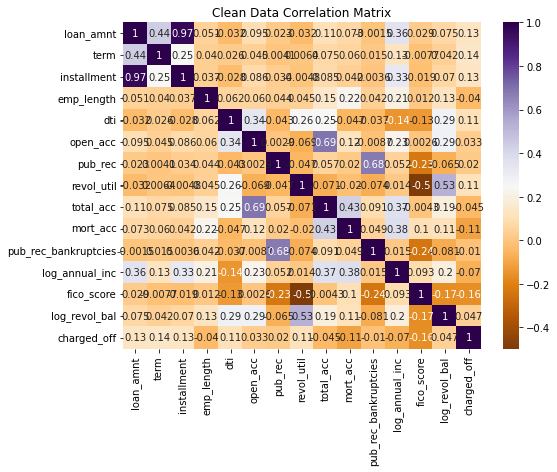

In [18]:
df3=df2.copy()
corrmat = df3.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(8,6))
#plot heat map
g=sns.heatmap(df3[top_corr_features].corr(),annot=True,cmap="PuOr")
plt.title("Clean Data Correlation Matrix")
plt.show()

In [19]:
df3.drop('installment',axis=1,inplace=True)
df3.shape

(6802, 17)

In [21]:
dummies=pd.get_dummies(df3, columns=["home_ownership", "verification_status","application_type"], prefix=["ownership","verification","application"],drop_first=True)
df4=pd.concat([dummies],axis='columns')
# df4.tail()

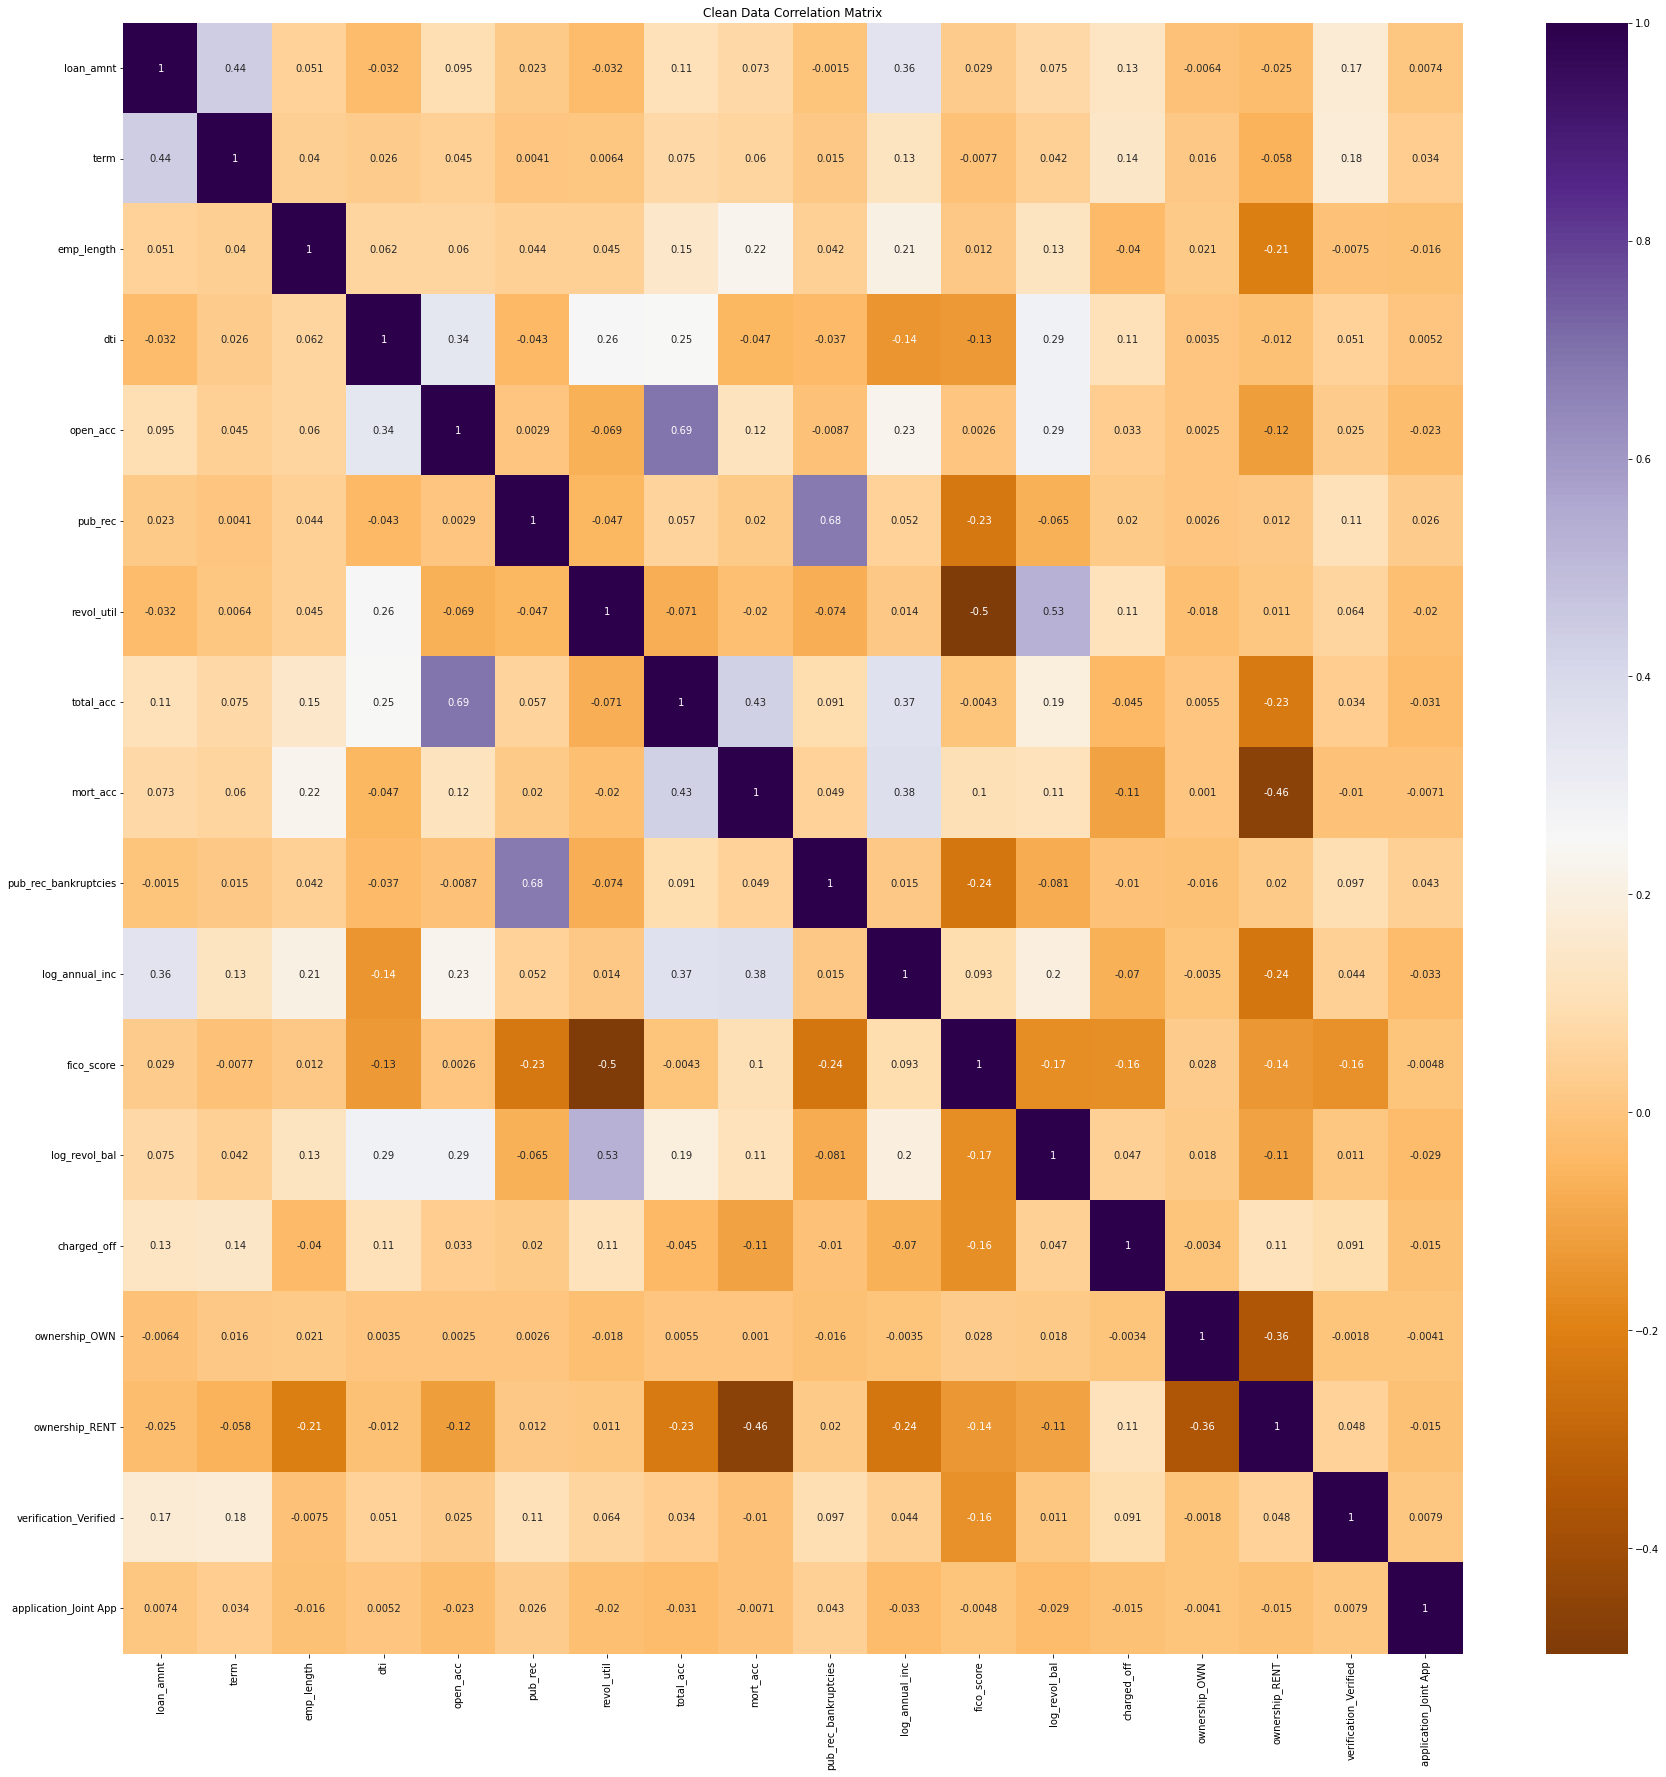

In [22]:
df5=df4.copy()
corrmat = df5.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))
#plot heat map
g=sns.heatmap(df5[top_corr_features].corr(),annot=True,cmap="PuOr")
plt.title("Clean Data Correlation Matrix")
plt.show()

# Machine Learning Implementations

## Classification without Balancing

LogReg
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1440
           1       0.44      0.05      0.08       261

    accuracy                           0.84      1701
   macro avg       0.65      0.52      0.50      1701
weighted avg       0.79      0.84      0.79      1701

0.8447971781305115
0.4444444444444444
0.04597701149425287
0.08333333333333333
0.5177801724137931


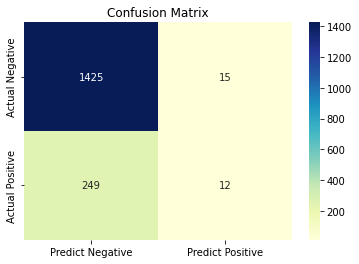

RF
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1440
           1       0.30      0.05      0.09       261

    accuracy                           0.84      1701
   macro avg       0.57      0.51      0.50      1701
weighted avg       0.77      0.84      0.78      1701

0.8359788359788359
0.29545454545454547
0.04980842911877394
0.08524590163934426
0.514140325670498


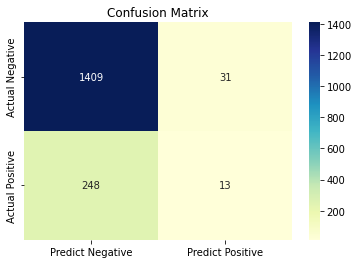

KNN
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1440
           1       0.22      0.05      0.09       261

    accuracy                           0.82      1701
   macro avg       0.53      0.51      0.49      1701
weighted avg       0.75      0.82      0.78      1701

0.824808935920047
0.2153846153846154
0.05363984674329502
0.08588957055214724
0.5091115900383142


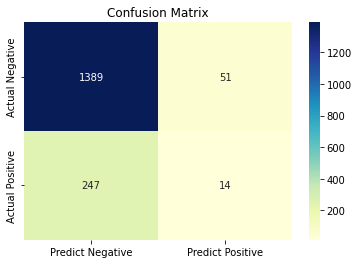

SVM
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1440
           1       0.00      0.00      0.00       261

    accuracy                           0.85      1701
   macro avg       0.42      0.50      0.46      1701
weighted avg       0.72      0.85      0.78      1701

0.8465608465608465
0.0
0.0
0.0
0.5


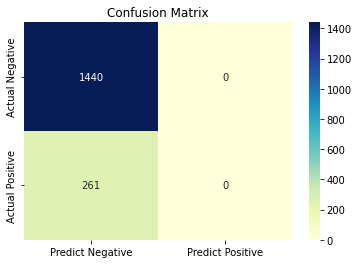

LDA
              precision    recall  f1-score   support

           0       0.86      0.98      0.91      1440
           1       0.46      0.11      0.17       261

    accuracy                           0.84      1701
   macro avg       0.66      0.54      0.54      1701
weighted avg       0.80      0.84      0.80      1701

0.8436213991769548
0.45901639344262296
0.10727969348659004
0.1739130434782609
0.5421815134099617


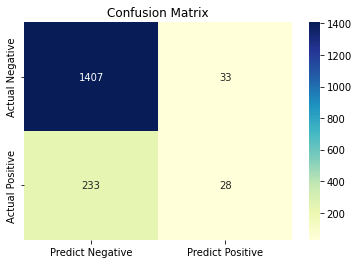

QDA
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1440
           1       0.24      0.38      0.29       261

    accuracy                           0.72      1701
   macro avg       0.56      0.58      0.56      1701
weighted avg       0.78      0.72      0.75      1701

0.7225161669606114
0.24078624078624078
0.37547892720306514
0.29341317365269465
0.5804477969348659


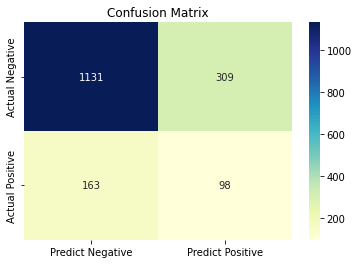

GNB
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1440
           1       0.27      0.40      0.32       261

    accuracy                           0.74      1701
   macro avg       0.57      0.60      0.58      1701
weighted avg       0.79      0.74      0.76      1701

0.7407407407407407
0.26804123711340205
0.39846743295019155
0.3204930662557781
0.6006226053639847


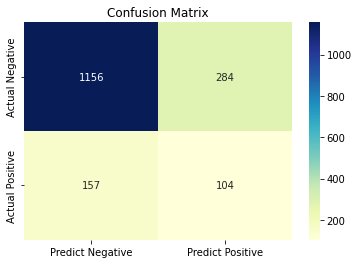

XGB
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1440
           1       0.43      0.12      0.19       261

    accuracy                           0.84      1701
   macro avg       0.64      0.55      0.55      1701
weighted avg       0.79      0.84      0.80      1701

0.8406819517930629
0.4305555555555556
0.11877394636015326
0.1861861861861862
0.5451508620689656


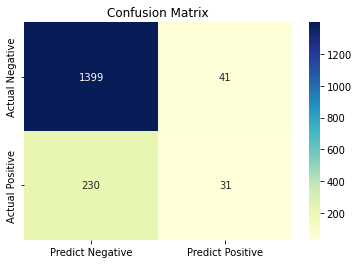

LGBM
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1440
           1       0.35      0.14      0.20       261

    accuracy                           0.83      1701
   macro avg       0.60      0.55      0.55      1701
weighted avg       0.78      0.83      0.80      1701

0.8277483833039389
0.34615384615384615
0.13793103448275862
0.19726027397260273
0.5453544061302682


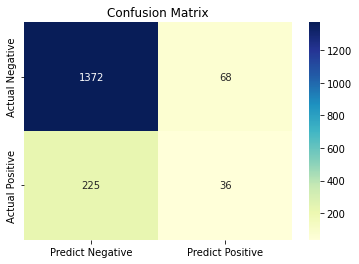

## Classification on Balanced with SMOTE

Counter({0: 4319, 1: 4319})


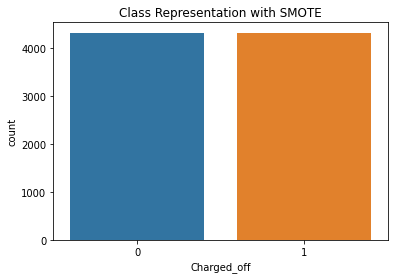

Counter({0: 4319, 1: 782})


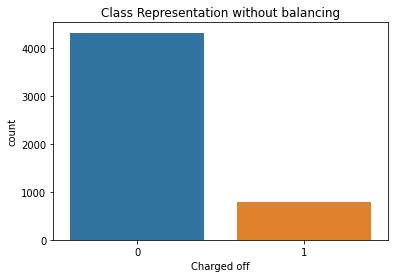

LogReg
              precision    recall  f1-score   support

           0       0.91      0.67      0.77      1440
           1       0.26      0.64      0.37       261

    accuracy                           0.67      1701
   macro avg       0.59      0.66      0.57      1701
weighted avg       0.81      0.67      0.71      1701

0.6672545561434451
0.2620904836193448
0.6436781609195402
0.3725055432372505
0.6576029693486589


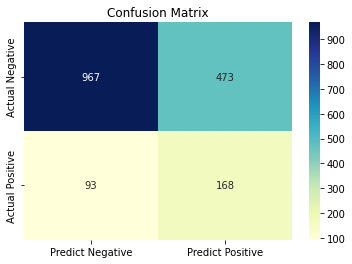

RF
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1440
           1       0.18      0.22      0.20       261

    accuracy                           0.73      1701
   macro avg       0.52      0.52      0.52      1701
weighted avg       0.75      0.73      0.74      1701

0.7289829512051734
0.18354430379746836
0.2222222222222222
0.20103986135181975
0.5215277777777778


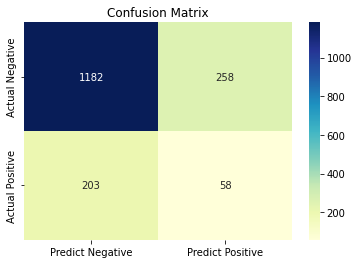

KNN
              precision    recall  f1-score   support

           0       0.88      0.67      0.76      1440
           1       0.21      0.48      0.29       261

    accuracy                           0.64      1701
   macro avg       0.54      0.57      0.53      1701
weighted avg       0.77      0.64      0.69      1701

0.6419753086419753
0.2080536912751678
0.47509578544061304
0.2893815635939323
0.5736590038314177


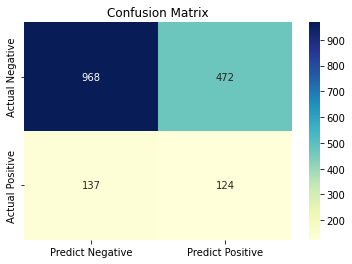

SVM
              precision    recall  f1-score   support

           0       0.89      0.72      0.80      1440
           1       0.26      0.53      0.35       261

    accuracy                           0.69      1701
   macro avg       0.58      0.63      0.57      1701
weighted avg       0.80      0.69      0.73      1701

0.6907701352145796
0.2559852670349908
0.5325670498084292
0.34577114427860695
0.6260057471264369


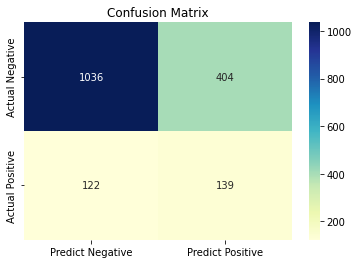

LDA
              precision    recall  f1-score   support

           0       0.92      0.63      0.75      1440
           1       0.25      0.69      0.37       261

    accuracy                           0.64      1701
   macro avg       0.59      0.66      0.56      1701
weighted avg       0.82      0.64      0.69      1701

0.6396237507348619
0.2535014005602241
0.6934865900383141
0.3712820512820512
0.6616738505747126


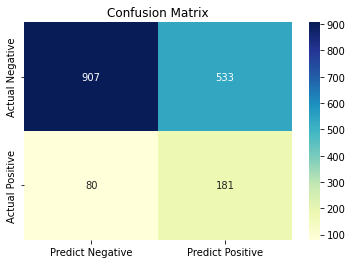

QDA
              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1440
           1       0.21      0.36      0.26       261

    accuracy                           0.70      1701
   macro avg       0.54      0.56      0.54      1701
weighted avg       0.77      0.70      0.73      1701

0.6966490299823633
0.2108843537414966
0.3563218390804598
0.26495726495726496
0.5573275862068965


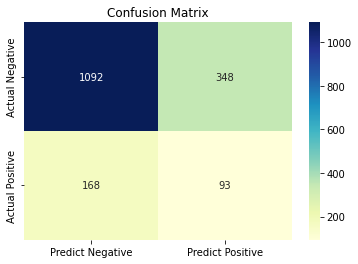

GNB
              precision    recall  f1-score   support

           0       0.88      0.64      0.74      1440
           1       0.21      0.51      0.29       261

    accuracy                           0.62      1701
   macro avg       0.54      0.58      0.52      1701
weighted avg       0.78      0.62      0.67      1701

0.6213991769547325
0.20583717357910905
0.5134099616858238
0.293859649122807
0.577191091954023


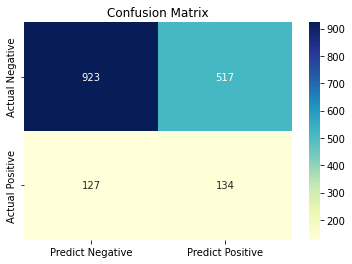

XGB
              precision    recall  f1-score   support

           0       0.89      0.58      0.70      1440
           1       0.21      0.61      0.31       261

    accuracy                           0.58      1701
   macro avg       0.55      0.59      0.50      1701
weighted avg       0.79      0.58      0.64      1701

0.5814226925338036
0.2067620286085826
0.6091954022988506
0.3087378640776699
0.5927921455938697


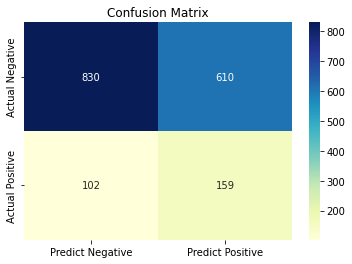

LGBM
              precision    recall  f1-score   support

           0       0.90      0.40      0.56      1440
           1       0.19      0.75      0.30       261

    accuracy                           0.46      1701
   macro avg       0.54      0.58      0.43      1701
weighted avg       0.79      0.46      0.52      1701

0.4585537918871252
0.1869070208728653
0.7547892720306514
0.2996197718631179
0.5798251915708812


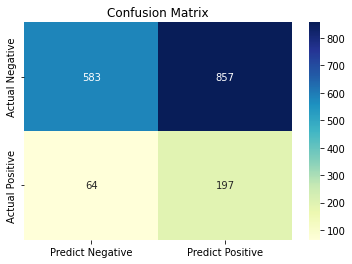

## Classification on Balanced with ADASYN

Counter({1: 4357, 0: 4319})


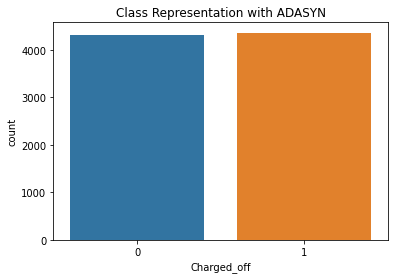

LogReg
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1440
           1       0.27      0.61      0.37       261

    accuracy                           0.69      1701
   macro avg       0.59      0.65      0.58      1701
weighted avg       0.81      0.69      0.73      1701

0.6860670194003528
0.26903553299492383
0.6091954022988506
0.37323943661971826
0.6545977011494253


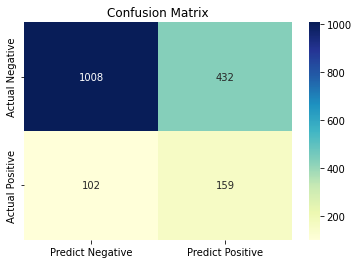

RF
              precision    recall  f1-score   support

           0       0.86      0.77      0.81      1440
           1       0.18      0.29      0.23       261

    accuracy                           0.69      1701
   macro avg       0.52      0.53      0.52      1701
weighted avg       0.75      0.69      0.72      1701

0.6931216931216931
0.18401937046004843
0.29118773946360155
0.22551928783382788
0.5285799808429119


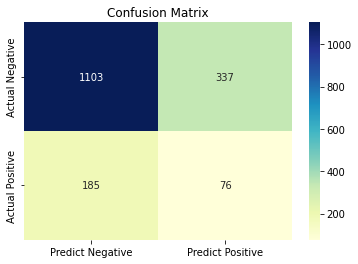

KNN
              precision    recall  f1-score   support

           0       0.87      0.65      0.75      1440
           1       0.20      0.48      0.28       261

    accuracy                           0.63      1701
   macro avg       0.54      0.57      0.51      1701
weighted avg       0.77      0.63      0.68      1701

0.6261022927689595
0.2
0.4789272030651341
0.28216704288939054
0.5658524904214559


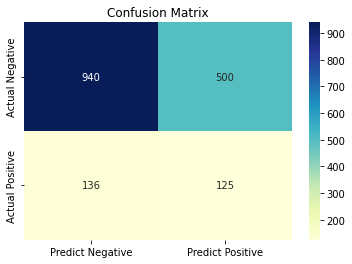

SVM
              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1440
           1       0.26      0.49      0.34       261

    accuracy                           0.71      1701
   macro avg       0.58      0.62      0.58      1701
weighted avg       0.79      0.71      0.74      1701

0.7072310405643739
0.2606060606060606
0.4942528735632184
0.3412698412698412
0.6200431034482758


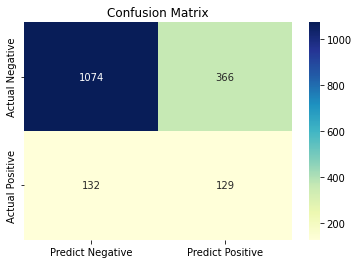

LDA
              precision    recall  f1-score   support

           0       0.92      0.67      0.78      1440
           1       0.27      0.66      0.38       261

    accuracy                           0.67      1701
   macro avg       0.59      0.67      0.58      1701
weighted avg       0.82      0.67      0.72      1701

0.671957671957672
0.2690513219284603
0.6628352490421456
0.38274336283185845
0.6682231800766284


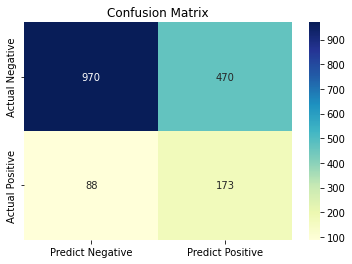

QDA
              precision    recall  f1-score   support

           0       0.87      0.77      0.81      1440
           1       0.21      0.34      0.26       261

    accuracy                           0.70      1701
   macro avg       0.54      0.56      0.54      1701
weighted avg       0.77      0.70      0.73      1701

0.7031158142269254
0.21226415094339623
0.3448275862068966
0.26277372262773724
0.556441570881226


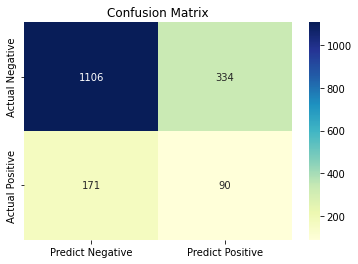

GNB
              precision    recall  f1-score   support

           0       0.88      0.65      0.75      1440
           1       0.21      0.50      0.29       261

    accuracy                           0.63      1701
   macro avg       0.54      0.58      0.52      1701
weighted avg       0.77      0.63      0.68      1701

0.6284538506760728
0.20602218700475436
0.49808429118773945
0.29147982062780264
0.5750838122605364


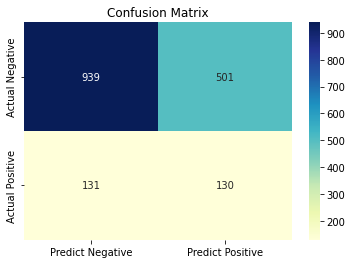

XGB
              precision    recall  f1-score   support

           0       0.89      0.59      0.71      1440
           1       0.21      0.59      0.31       261

    accuracy                           0.59      1701
   macro avg       0.55      0.59      0.51      1701
weighted avg       0.78      0.59      0.65      1701

0.5890652557319224
0.2064343163538874
0.5900383141762452
0.3058589870903674
0.589463601532567


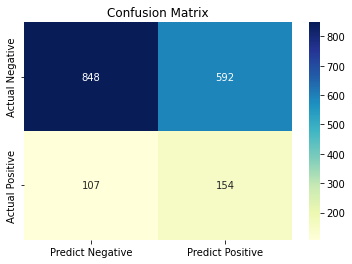

LGBM
              precision    recall  f1-score   support

           0       0.90      0.38      0.53      1440
           1       0.18      0.76      0.29       261

    accuracy                           0.44      1701
   macro avg       0.54      0.57      0.41      1701
weighted avg       0.79      0.44      0.50      1701

0.43797766019988243
0.18148487626031165
0.7586206896551724
0.29289940828402367
0.5692409003831418


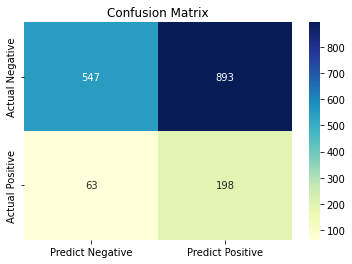

## Classification on Balanced with Borderline Smote

Counter({0: 4319, 1: 4319})


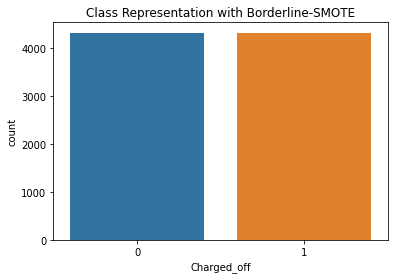

LogReg
              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1440
           1       0.26      0.57      0.36       261

    accuracy                           0.69      1701
   macro avg       0.58      0.64      0.58      1701
weighted avg       0.80      0.69      0.73      1701

0.6872427983539094
0.2618629173989455
0.5708812260536399
0.35903614457831323
0.6396072796934865


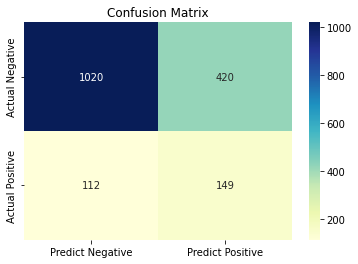

RF
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1440
           1       0.26      0.25      0.25       261

    accuracy                           0.77      1701
   macro avg       0.56      0.56      0.56      1701
weighted avg       0.77      0.77      0.77      1701

0.7748383303938859
0.25793650793650796
0.24904214559386972
0.253411306042885
0.5595905172413793


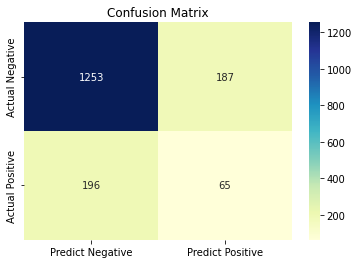

KNN
              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1440
           1       0.23      0.41      0.30       261

    accuracy                           0.70      1701
   macro avg       0.55      0.58      0.55      1701
weighted avg       0.78      0.70      0.73      1701

0.6995884773662552
0.23060344827586207
0.4099616858237548
0.29517241379310344
0.581022509578544


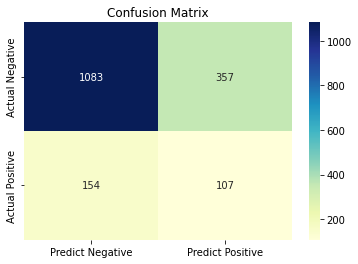

SVM
              precision    recall  f1-score   support

           0       0.89      0.77      0.83      1440
           1       0.28      0.48      0.35       261

    accuracy                           0.73      1701
   macro avg       0.58      0.63      0.59      1701
weighted avg       0.80      0.73      0.75      1701

0.7272192827748384
0.27593818984547464
0.4789272030651341
0.350140056022409
0.6255747126436783


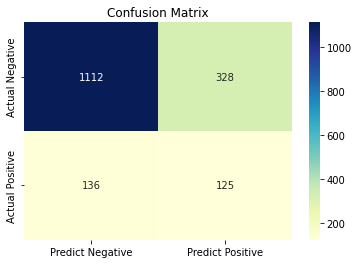

LDA
              precision    recall  f1-score   support

           0       0.91      0.68      0.77      1440
           1       0.25      0.61      0.36       261

    accuracy                           0.67      1701
   macro avg       0.58      0.64      0.57      1701
weighted avg       0.81      0.67      0.71      1701

0.6660787771898883
0.2544
0.6091954022988506
0.35891647855530473
0.6427921455938698


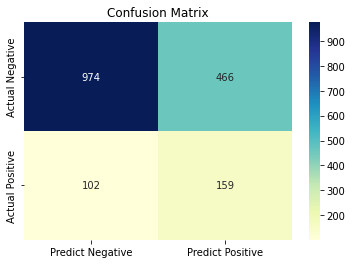

QDA
              precision    recall  f1-score   support

           0       0.89      0.63      0.74      1440
           1       0.21      0.56      0.31       261

    accuracy                           0.62      1701
   macro avg       0.55      0.59      0.52      1701
weighted avg       0.78      0.62      0.67      1701

0.6184597295708407
0.21470588235294116
0.5593869731800766
0.310308182784272
0.5942768199233716


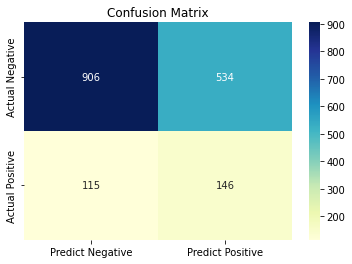

GNB
              precision    recall  f1-score   support

           0       0.90      0.56      0.69      1440
           1       0.21      0.65      0.32       261

    accuracy                           0.57      1701
   macro avg       0.55      0.60      0.50      1701
weighted avg       0.79      0.57      0.63      1701

0.5731922398589065
0.21046077210460773
0.6475095785440613
0.3176691729323308
0.6036159003831418


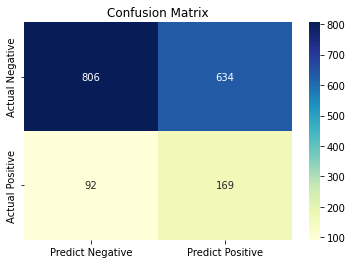

XGB
              precision    recall  f1-score   support

           0       0.90      0.60      0.72      1440
           1       0.23      0.64      0.33       261

    accuracy                           0.61      1701
   macro avg       0.56      0.62      0.53      1701
weighted avg       0.80      0.61      0.66      1701

0.606114050558495
0.22550335570469798
0.6436781609195402
0.33399602385685884
0.6214918582375479


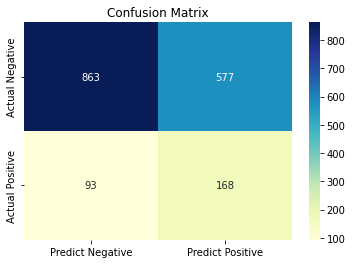

LGBM
              precision    recall  f1-score   support

           0       0.92      0.47      0.62      1440
           1       0.21      0.79      0.33       261

    accuracy                           0.52      1701
   macro avg       0.57      0.63      0.48      1701
weighted avg       0.81      0.52      0.58      1701

0.5173427395649618
0.211340206185567
0.7854406130268199
0.33306255077173025
0.62709530651341


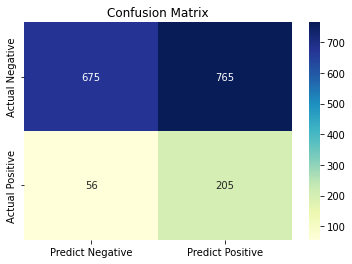

0.62709530651341


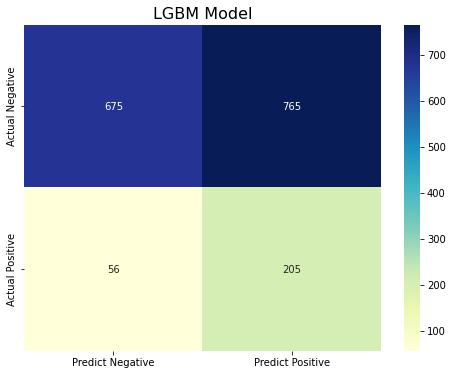

## Conclusions Borderline-SMOTE

0.6436661877394636


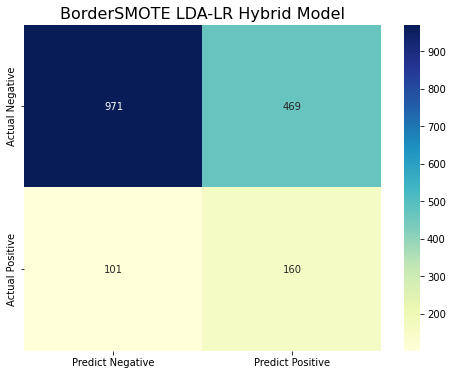

,Model,Accuracy,Precision,Recall,F1_score,AUC_ROC
9,HybridLDALR,0.6649,0.2544,0.6130,0.3596,0.6437
5,Linear Discriminant Analysis,0.6661,0.2544,0.6092,0.3589,0.6428
0,Logistic Regression,0.6872,0.2619,0.5709,0.3590,0.6396
8,LightGBM,0.5173,0.2113,0.7854,0.3331,0.6271
4,Support Vector Machines,0.7278,0.2746,0.4713,0.3470,0.6228
7,XGB,0.6061,0.2255,0.6437,0.3340,0.6215
3,Gaussian Naive Bayes,0.5732,0.2105,0.6475,0.3177,0.6036
6,Quadratic Discriminant Analysis,0.6185,0.2147,0.5594,0.3103,0.5943
2,K- Nearest Neighbors,0.6996,0.2306,0.4100,0.2952,0.5810
1,Random Forest,0.7590,0.2210,0.2261,0.2235,0.5408


## Conclusions SMOTE

0.6599377394636015


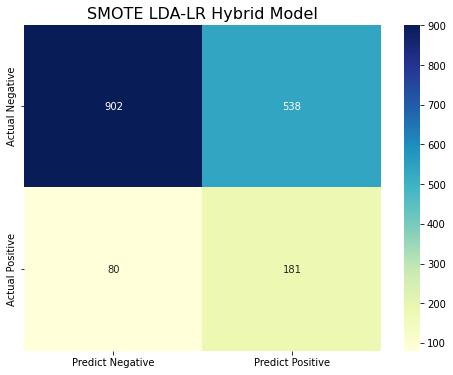

,Model,Accuracy,Precision,Recall,F1_score,AUC_ROC
5,Linear Discriminant Analysis,0.6396,0.2535,0.6935,0.3713,0.6617
9,HybridLDALR,0.6367,0.2517,0.6935,0.3694,0.6599
0,Logistic Regression,0.6673,0.2621,0.6437,0.3725,0.6576
4,Support Vector Machines,0.6908,0.2560,0.5326,0.3458,0.6260
7,XGB,0.5814,0.2068,0.6092,0.3087,0.5928
8,LightGBM,0.4586,0.1869,0.7548,0.2996,0.5798
3,Gaussian Naive Bayes,0.6214,0.2058,0.5134,0.2939,0.5772
2,K- Nearest Neighbors,0.6420,0.2081,0.4751,0.2894,0.5737
6,Quadratic Discriminant Analysis,0.6966,0.2109,0.3563,0.2650,0.5573
1,Random Forest,0.7290,0.1988,0.2529,0.2226,0.5341


## Conclusions ADASYN

0.6657926245210728


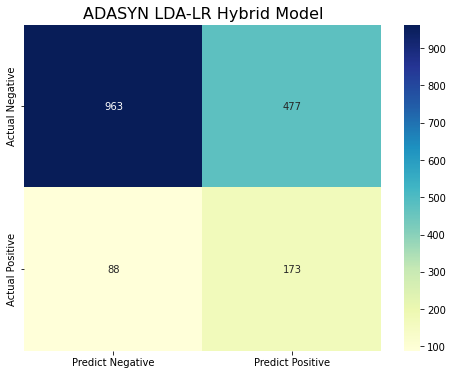

,Model,Accuracy,Precision,Recall,F1_score,AUC_ROC
5,Linear Discriminant Analysis,0.6720,0.2691,0.6628,0.3827,0.6682
9,HybridLDALR,0.6678,0.2662,0.6628,0.3798,0.6658
0,Logistic Regression,0.6861,0.2690,0.6092,0.3732,0.6546
4,Support Vector Machines,0.7072,0.2606,0.4943,0.3413,0.6200
7,XGB,0.5891,0.2064,0.5900,0.3059,0.5895
3,Gaussian Naive Bayes,0.6285,0.2060,0.4981,0.2915,0.5751
8,LightGBM,0.4380,0.1815,0.7586,0.2929,0.5692
2,K- Nearest Neighbors,0.6261,0.2000,0.4789,0.2822,0.5659
6,Quadratic Discriminant Analysis,0.7031,0.2123,0.3448,0.2628,0.5564
1,Random Forest,0.7360,0.2025,0.2452,0.2218,0.5351
